In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import seaborn as sns


In [29]:

def logcurve(x, a, b, c, d):
    """
    Logistic function with parameters a, b, c, d
    a is the curve's maximum value
    b is an offset value
    c is the logistic growth rate or steepness of the curve
    d is the x value of the sigmoid's midpoint
    """
    return a / (1 + np.exp(-c * (x - d))) + b

def fit_curve(species):
    species_df = master_sequence_nn.loc[master_sequence_nn['species_name'] == species]
    species_df = species_df.sort_values(by=['year'])
    time=species_df['t_after_first_recorded_invasion']
    num_inv=species_df['num_invasions']

   
    x = np.arange(0, len(num_inv))
    popt, pcov = curve_fit(logcurve, time, num_inv, p0=[max(num_inv) , 0, 0.1, 20], maxfev=100000)


    return species, popt, pcov, time, num_inv

def plot_curve(species, popt, pcov, time, num_inv):
    plt.figure(figsize=(10, 6))
    plt.scatter(time, num_inv, label='data')
    plt.plot(time, logcurve(time, *popt), 'r-', label='fit')
    plt.xlabel('time (years)')
    plt.ylabel('number of invasions')
    plt.title(species)
    plt.legend()
    plt.show()
    

The data consist of first records for invasive insect species - for each species, a year and a country. Let's filter to species that have invaded at least 10 countries. 

In [5]:
master_sequence = pd.read_csv(r"master_sequence_all_species_unique.csv", low_memory=False)
master_sequence_nn = master_sequence[master_sequence['Native'] == False]
master_sequence_nn = master_sequence_nn[master_sequence_nn['non_native_observed_countries']> 10]
master_sequence_nn.head()


,0,ISO3,Native,Reference,Source,Type,native_observed_countries,non_native_observed_countries,num_invasions,species_name,t_after_first_record,t_after_first_recorded_invasion,total_observed_countries,usageKey,year
20,NaN,DEU,False,Counts API,GBIF,First report,0.0,1.0,1.0,Carpophilus,12.0,0.0,69.0,1044105,1982.0
70,NaN,NZL,False,Counts API,GBIF,First report,0.0,1.0,1.0,Trachymela,6.0,0.0,7.0,1048548,1976.0
76,NaN,ISR,False,DAISIE,ASFR,First report,0.0,1.0,1.0,Platyscapa quadraticeps,0.0,0.0,1.0,1359478,1968.0
87,NaN,CAN,False,CABI ISC,ASFR,First report,0.0,2.0,1.0,Adelges tsugae,0.0,0.0,4.0,2049739,1921.0
88,NaN,USA,False,CABI ISC,ASFR,First report,0.0,2.0,2.0,Adelges tsugae,1.0,1.0,4.0,2049739,1922.0


From a theoretical perspective, the number of countries invaded through time should approximate a logistic curve - at least for species that have already fully invaded all possible countries. 
Bemisia tabaci demonstrates this pattern quite well (as do many others in the dataset). 

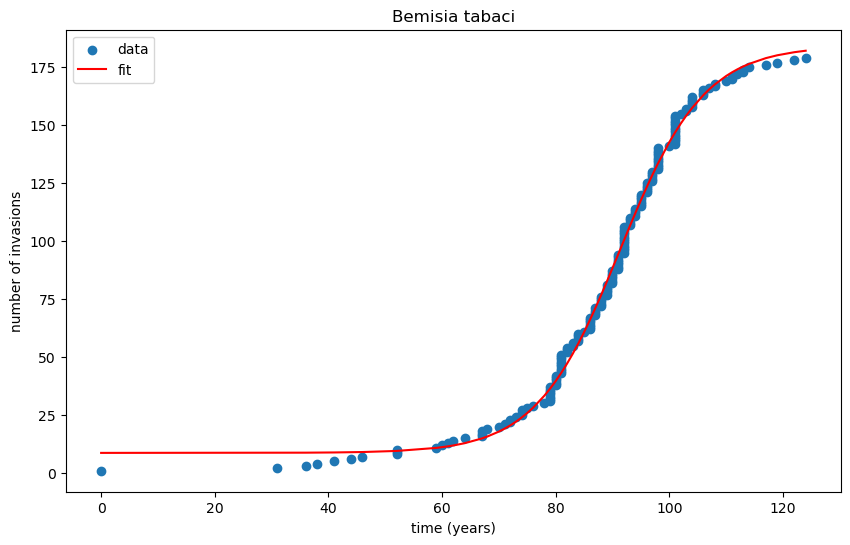

In [30]:
plot_curve(*fit_curve('Bemisia tabaci'))

However, not all species are great fits for a logistic curve in the most direct application. 

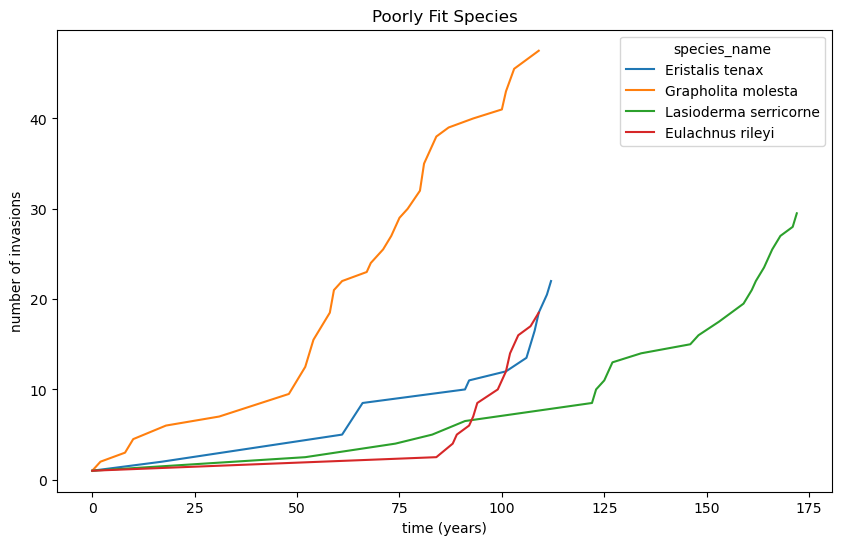

In [27]:
poorly_fit_species = [
    "Eulachnus rileyi",
    "Lasioderma serricorne",
    "Insignorthus insignis",
    "Grapholita molesta",
    "Eristalis tenax",
]

poorly_fit_subselection = master_sequence_nn[
    master_sequence_nn["species_name"].isin(poorly_fit_species)
]
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="t_after_first_recorded_invasion",
    y="num_invasions",
    hue="species_name",
    data=poorly_fit_subselection,
    errorbar=None,
    ax=ax,
)
ax.set_xlabel("time (years)")
ax.set_ylabel("number of invasions")
ax.set_title("Poorly Fit Species")
plt.show()

Using the above methodology to fit to these invasion sequences doesn't work well

e.g. with  'Eulachnus rileyi' (red) - you can obviously overfit a curve to anything

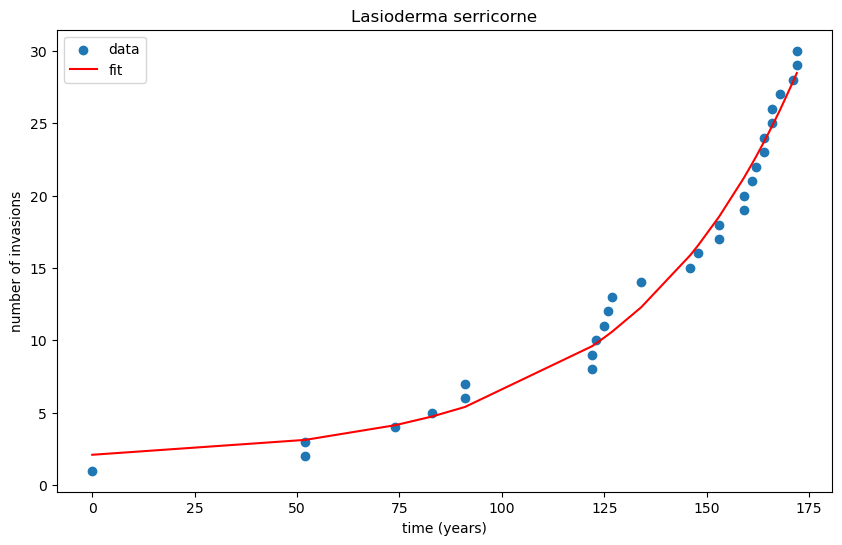

In [32]:
plot_curve(*fit_curve(  "Lasioderma serricorne"))

This leaves a few unanswered questions about fitting to these invasion sequences

1. How many invasions is too few invasions?
2. What threshold should be selected to goodness-of-fit / resisduals?
3. Sould alternative regressions be used even if logistic is the theoretical best option?
4. What are the best practices to fit the data with an offset?